<a href="https://colab.research.google.com/github/GabrielQN/data_analysis_movies/blob/master/statistic_analisys_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
tmdb = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_science_python/aula0/tmdb_5000_movies.csv')

In [205]:
tmdb.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [206]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [0]:
import seaborn as sns

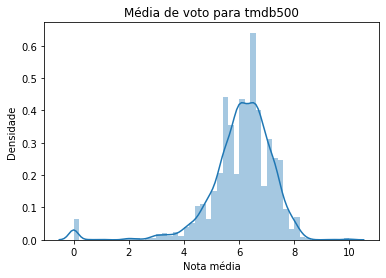

In [208]:
ax = sns.distplot(tmdb.vote_average)
ax.set(
    xlabel = "Nota média", 
    ylabel="Densidade",
    title="Média de voto para tmdb500",
    )
ax

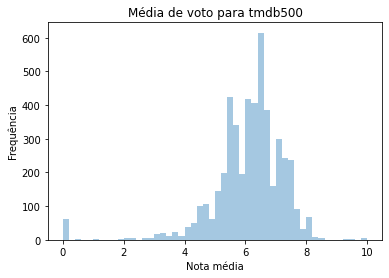

In [209]:
ax = sns.distplot(tmdb.vote_average, norm_hist=False, kde=False)
ax.set(
    xlabel = "Nota média", 
    ylabel="Frequência",
    title="Média de voto para tmdb500"
    )
ax

Text(0.5, 1.0, 'Distribuição de notas médias dos filmes do TMDB 5000')

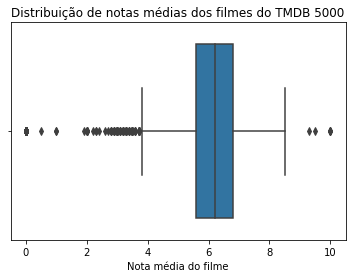

In [210]:
ax = sns.boxplot(tmdb.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de notas médias dos filmes do TMDB 5000")

In [211]:
tmdb.query("vote_average == 0").head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [0]:
tmdb_com_mais_de_10_votos = tmdb.query("vote_count >= 10")

In [213]:
tmdb_com_mais_de_10_votos.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.392000e+03,4392.000000,4392.000000,4.392000e+03,4391.000000,4392.000000,4392.000000
mean,3.164545e+07,49204.119991,23.448815,8.990969e+07,108.430881,6.226935,754.441712
std,4.162736e+07,80136.249777,32.592158,1.682870e+08,21.014719,0.893215,1272.263761
min,0.000000e+00,5.000000,0.011697,0.000000e+00,0.000000,1.900000,10.000000
25%,2.895962e+06,8403.500000,6.512166,1.365700e+04,95.000000,5.700000,83.750000
50%,1.700000e+07,13084.500000,14.827784,2.685837e+07,105.000000,6.300000,288.500000
75%,4.200000e+07,46831.250000,30.258282,1.022818e+08,118.500000,6.800000,831.000000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,8.500000,13752.000000


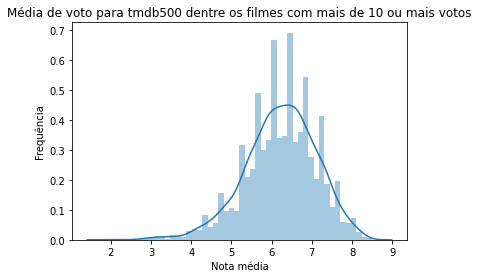

In [214]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_average, norm_hist=False)
ax.set(
    xlabel = "Nota média", 
    ylabel="Frequência",
    title="Média de voto para tmdb500 dentre os filmes com mais de 10 ou mais votos"
    )
ax

Text(0.5, 1.0, 'Distribuição de notas médias dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos')

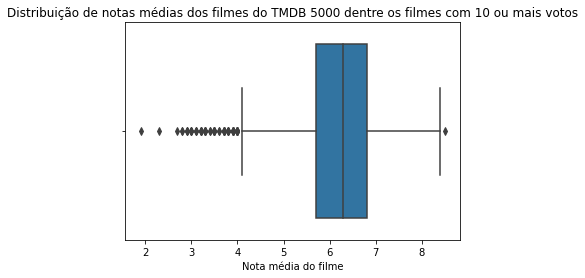

In [215]:
ax = sns.boxplot(tmdb_com_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de notas médias dos filmes do TMDB 5000 dentre os filmes com 10 ou mais votos")

# Analisaremos também o movielens



In [0]:
notas = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_science_python/aula0/ratings.csv')

In [217]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
nota_media_por_filme = notas.groupby("movieId").mean().rating

In [219]:
nota_media_por_filme.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

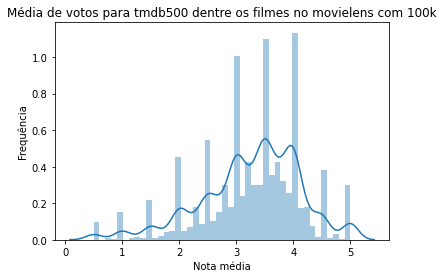

In [220]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(
    xlabel = "Nota média", 
    ylabel="Frequência",
    title="Média de votos para tmdb500 dentre os filmes no movielens com 100k"
    )
ax

In [221]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593])

In [0]:
nota_media_dos_filmes_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]

In [223]:
nota_media_dos_filmes_com_pelo_menos_10_votos.head()

movieId
1    3.920930
2    3.431818
3    3.259615
5    3.071429
6    3.946078
Name: rating, dtype: float64

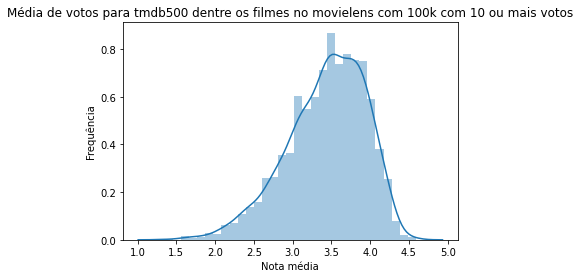

In [224]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(
    xlabel = "Nota média", 
    ylabel="Frequência",
    title="Média de votos para tmdb500 dentre os filmes no movielens com 100k com 10 ou mais votos"
    )
ax

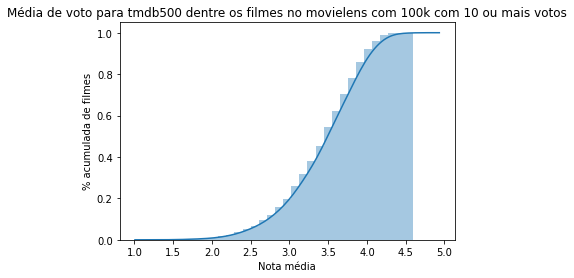

In [225]:
ax = sns.distplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values, 
                 hist_kws={'cumulative': True},
                  kde_kws={'cumulative': True})
ax.set(
    xlabel = "Nota média", 
    ylabel="% acumulada de filmes",
    title="Média de voto para tmdb500 dentre os filmes no movielens com 100k com 10 ou mais votos"
    )
ax

Text(0.5, 1.0, 'Distribuição de notas médias dos filmes do MovieLens 100k dentre os filmes com 10 ou mais votos')

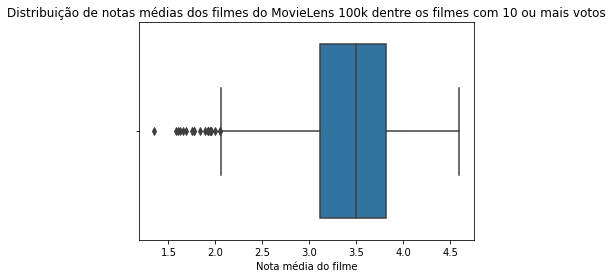

In [226]:
ax = sns.boxplot(nota_media_dos_filmes_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média do filme")
ax.set_title("Distribuição de notas médias dos filmes do MovieLens 100k dentre os filmes com 10 ou mais votos")

# Analisando a distribuição dos dados capturados de outros campos do TMDB


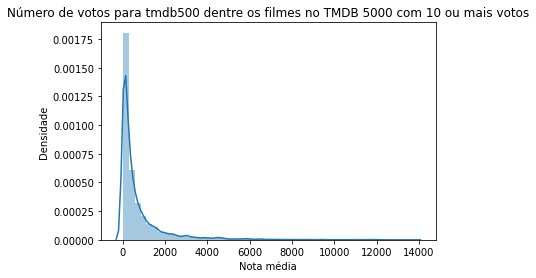

In [227]:
ax = sns.distplot(tmdb_com_mais_de_10_votos.vote_count)
ax.set(
    xlabel = "Nota média", 
    ylabel="Densidade",
    title="Número de votos para tmdb500 dentre os filmes no TMDB 5000 com 10 ou mais votos"
    )
ax

In [228]:
tmdb.query("budget > 0").budget

0       237000000
1       300000000
2       245000000
3       250000000
4       260000000
          ...    
4791           13
4792        20000
4796         7000
4798       220000
4799         9000
Name: budget, Length: 3766, dtype: int64

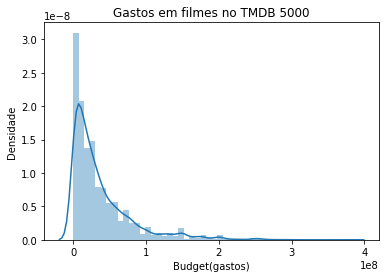

In [229]:
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(
    xlabel = "Budget(gastos)", 
    ylabel="Densidade",
    title="Gastos em filmes no TMDB 5000"
    )
ax

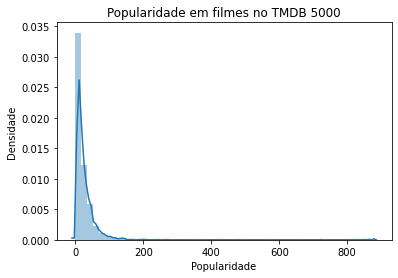

In [230]:
ax = sns.distplot(tmdb.popularity)
ax.set(
    xlabel = "Popularidade", 
    ylabel="Densidade",
    title="Popularidade em filmes no TMDB 5000"
    )
ax

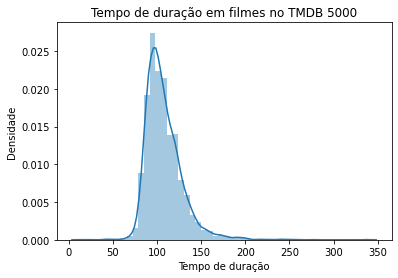

In [231]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna())
ax.set(
    xlabel = "Tempo de duração", 
    ylabel="Densidade",
    title="Tempo de duração em filmes no TMDB 5000"
    )
ax

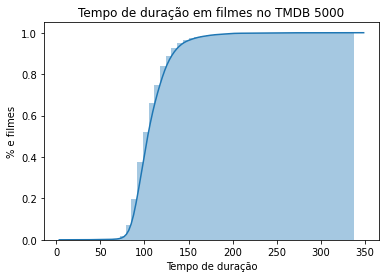

In [232]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna(),
                  hist_kws={"cumulative": True},
                  kde_kws={"cumulative": True})
ax.set(
    xlabel = "Tempo de duração", 
    ylabel="% e filmes",
    title="Tempo de duração em filmes no TMDB 5000"
    )
ax

In [233]:
tmdb.query("runtime > 0").runtime.dropna().quantile(0.8)

121.0

# Movielens: média dos filmes com pelo menos 10 votos

In [234]:
print("Média dos filmes com pelo menos 10 votos ", nota_media_dos_filmes_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos  3.4320503405352603


In [0]:
import matplotlib.pyplot as plt
import numpy as np

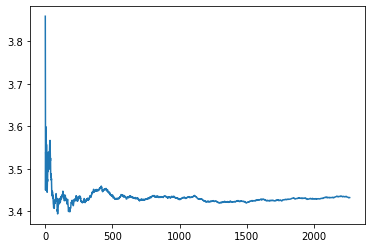

In [236]:
np.random.seed(75243)
temp = nota_media_dos_filmes_com_pelo_menos_10_votos.sample(frac=1)

medias = [temp[0:i].mean() for i in range(1, len(temp))]

plt.plot(medias)


In [0]:
from statsmodels.stats.weightstats import zconfint

In [238]:
zconfint(nota_media_dos_filmes_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [0]:
from statsmodels.stats.weightstats import DescrStatsW

In [0]:
descr_todos_com_10_votos = DescrStatsW(nota_media_dos_filmes_com_pelo_menos_10_votos)

In [242]:
descr_todos_com_10_votos.tconfint_mean()

(3.411234839229381, 3.4528658418411395)

# Vamos ver o filme 1


In [0]:
filmes = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data_science_python/aula0/movies.csv')

In [244]:
filmes.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [245]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


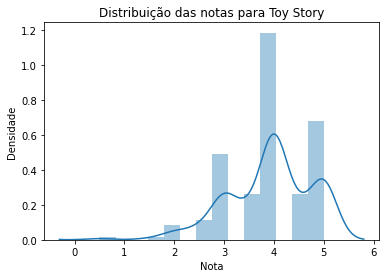

In [249]:
ax = sns.distplot(notas1.rating)
ax.set(
    xlabel = "Nota", 
    ylabel="Densidade",
    title="Distribuição das notas para Toy Story"
    )
ax

Text(0.5, 1.0, 'Distribuição de notas para Toy Story')

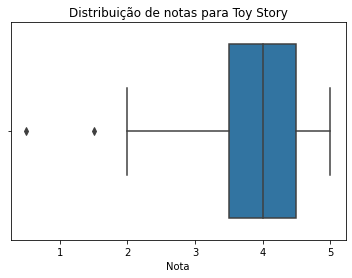

In [251]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel="Nota")
ax.set_title("Distribuição de notas para Toy Story")

In [253]:
notas1.rating.mean()

3.9209302325581397

In [254]:
notas1.rating.count()

215

In [255]:
zconfint(notas1.rating)

(3.8093359183563402, 4.032524546759939)

In [0]:
from statsmodels.stats.weightstats import ztest

In [261]:
ztest(notas1.rating, value = 3.4320503405352594)

(8.586342305916732, 8.978190401885648e-18)

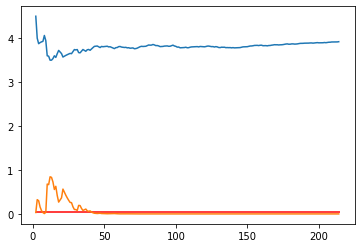

In [274]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
  media = temp[0:i].mean()
  stat, p = ztest(temp[0:i], value = 3.4320503405352594)
  return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2, len(temp))])

plt.plot(valores[:,0], valores[:,1])
plt.plot(valores[:,0], valores[:,2])
plt.hlines(y = 0.05, xmin = 2, xmax = len(temp), colors='red')


# Comparação entre dois conjuntos de amostras.

In [279]:
print(ztest(notas1.rating, notas.rating))
zconfint(notas1.rating, notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [281]:
from scipy.stats import ttest_ind

ttest_ind(notas1.rating, notas.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [0]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toy_story = DescrStatsW(notas1.rating)

In [0]:
comparacao = descr_todas_as_notas.get_compare(descr_toy_story)

In [289]:
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [290]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [0]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7ff33fe83630>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff33fe91080>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff33fe91b00>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff33fe91780>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff33fe83940>,
  <matplotlib.lines.Line2D at 0x7ff33fe9b5c0>]}

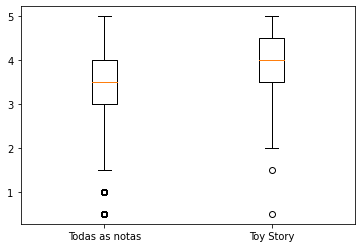

In [294]:
plt.boxplot([notas.rating, notas1.rating], labels = ["Todas as notas", "Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")